In [1]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"


/mnt/c/Users/hew7/Documents/venvs/RF-demos/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.enable_model_cpu_offload()




Loading pipeline components...: 100%|█████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.98it/s]


In [5]:
#load input image

init_image = Image.open('test_avatar.png', mode='r').convert("RGB")



100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  8.21it/s]


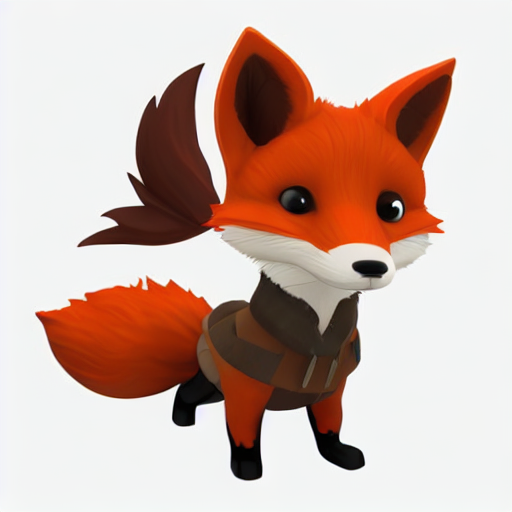

In [22]:
prompt = "A cute little cartoon fox avatar, dressed up as an homage to Stranger Things"

images = pipe(prompt=prompt, 
              negative_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality',
              image=init_image,
              strength=0.8, 
              guidance_scale=7.5).images
images[0]

In [11]:
len(images)

1